In [ ]:
!pip install rasterio

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = "/content/drive/MyDrive/Cellula/Task 3/data"

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [ ]:
data_path = "/content/drive/MyDrive/Cellula/Task 3/data"
images_path = os.path.join(data_path, "images")
labels_path = os.path.join(data_path, "labels")


In [ ]:
image_extensions = ('.png', '.jpg', '.jpeg', '.tif', '.tiff')

image_files = [f for f in os.listdir(images_path) if f.endswith(image_extensions)]
label_files = [f for f in os.listdir(labels_path) if f.endswith(image_extensions)]

print("Number of images:", len(image_files))
print("Number of labels:", len(label_files))


Number of images: 306
Number of labels: 456


In [ ]:
import rasterio

sample_image_path = os.path.join(images_path, image_files[0])

with rasterio.open(sample_image_path) as src:
    print("Number of bands:", src.count)
    print("Image shape (height, width):", src.height, src.width)

    all_bands = src.read()

print("Array shape:", all_bands.shape)


Number of bands: 12
Image shape (height, width): 128 128
Array shape: (12, 128, 128)


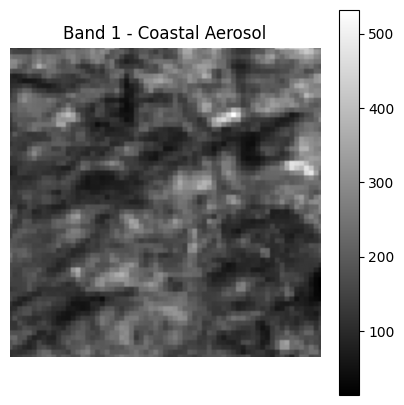

In [ ]:
coastal = all_bands[0]
coastal_norm = (coastal - coastal.min()) / (coastal.max() - coastal.min())
plt.figure(figsize=(5, 5))
plt.imshow(coastal, cmap='gray')
plt.title("Band 1 - Coastal Aerosol")
plt.colorbar()
plt.axis('off')
plt.show()


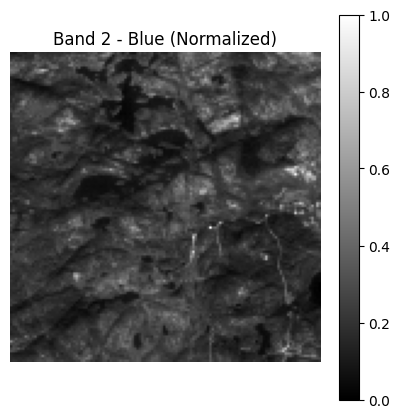

In [ ]:
blue = all_bands[1]
blue_norm = (blue - blue.min()) / (blue.max() - blue.min())

plt.figure(figsize=(5, 5))
plt.imshow(blue_norm, cmap='gray')
plt.title("Band 2 - Blue (Normalized)")
plt.colorbar()
plt.axis('off')
plt.show()


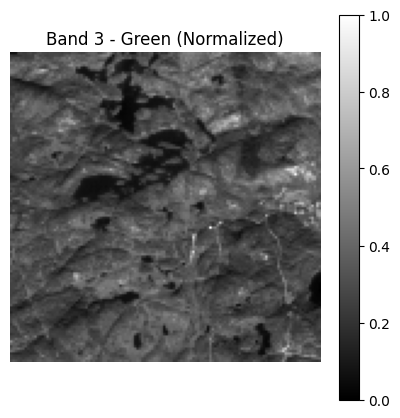

In [ ]:
green = all_bands[2]
green_norm = (green - green.min()) / (green.max() - green.min())

plt.figure(figsize=(5, 5))
plt.imshow(green_norm, cmap='gray')
plt.title("Band 3 - Green (Normalized)")
plt.colorbar()
plt.axis('off')
plt.show()


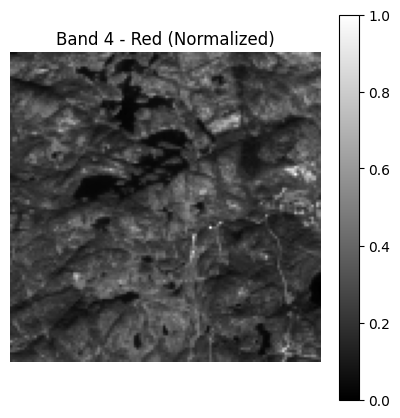

In [ ]:
red = all_bands[3]
red_norm = (red - red.min()) / (red.max() - red.min())

plt.figure(figsize=(5, 5))
plt.imshow(red_norm, cmap='gray')
plt.title("Band 4 - Red (Normalized)")
plt.colorbar()
plt.axis('off')
plt.show()


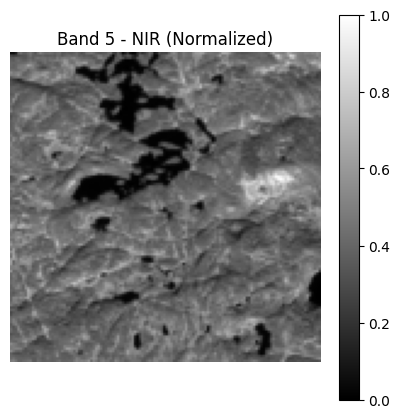

In [ ]:
nir = all_bands[4]
nir_norm = (nir - nir.min()) / (nir.max() - nir.min())

plt.figure(figsize=(5, 5))
plt.imshow(nir_norm, cmap='gray')
plt.title("Band 5 - NIR (Normalized)")
plt.colorbar()
plt.axis('off')
plt.show()


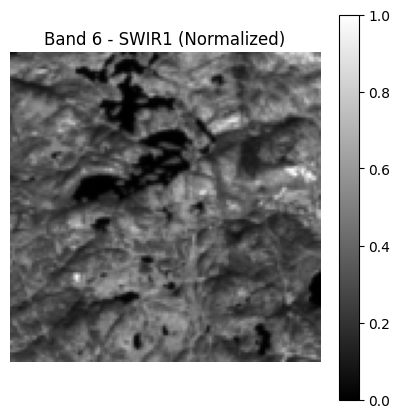

In [ ]:
swir1 = all_bands[5]
swir1_norm = (swir1 - swir1.min()) / (swir1.max() - swir1.min())

plt.figure(figsize=(5, 5))
plt.imshow(swir1_norm, cmap='gray')
plt.title("Band 6 - SWIR1 (Normalized)")
plt.colorbar()
plt.axis('off')
plt.show()


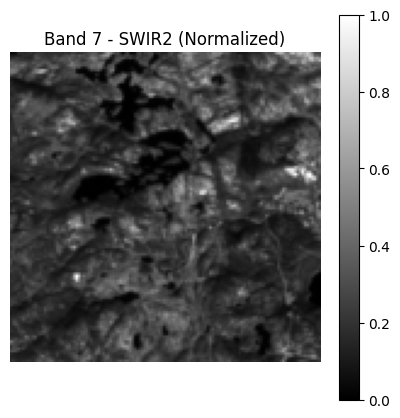

In [ ]:
swir2 = all_bands[6]
swir2_norm = (swir2 - swir2.min()) / (swir2.max() - swir2.min())

plt.figure(figsize=(5, 5))
plt.imshow(swir2_norm, cmap='gray')
plt.title("Band 7 - SWIR2 (Normalized)")
plt.colorbar()
plt.axis('off')
plt.show()


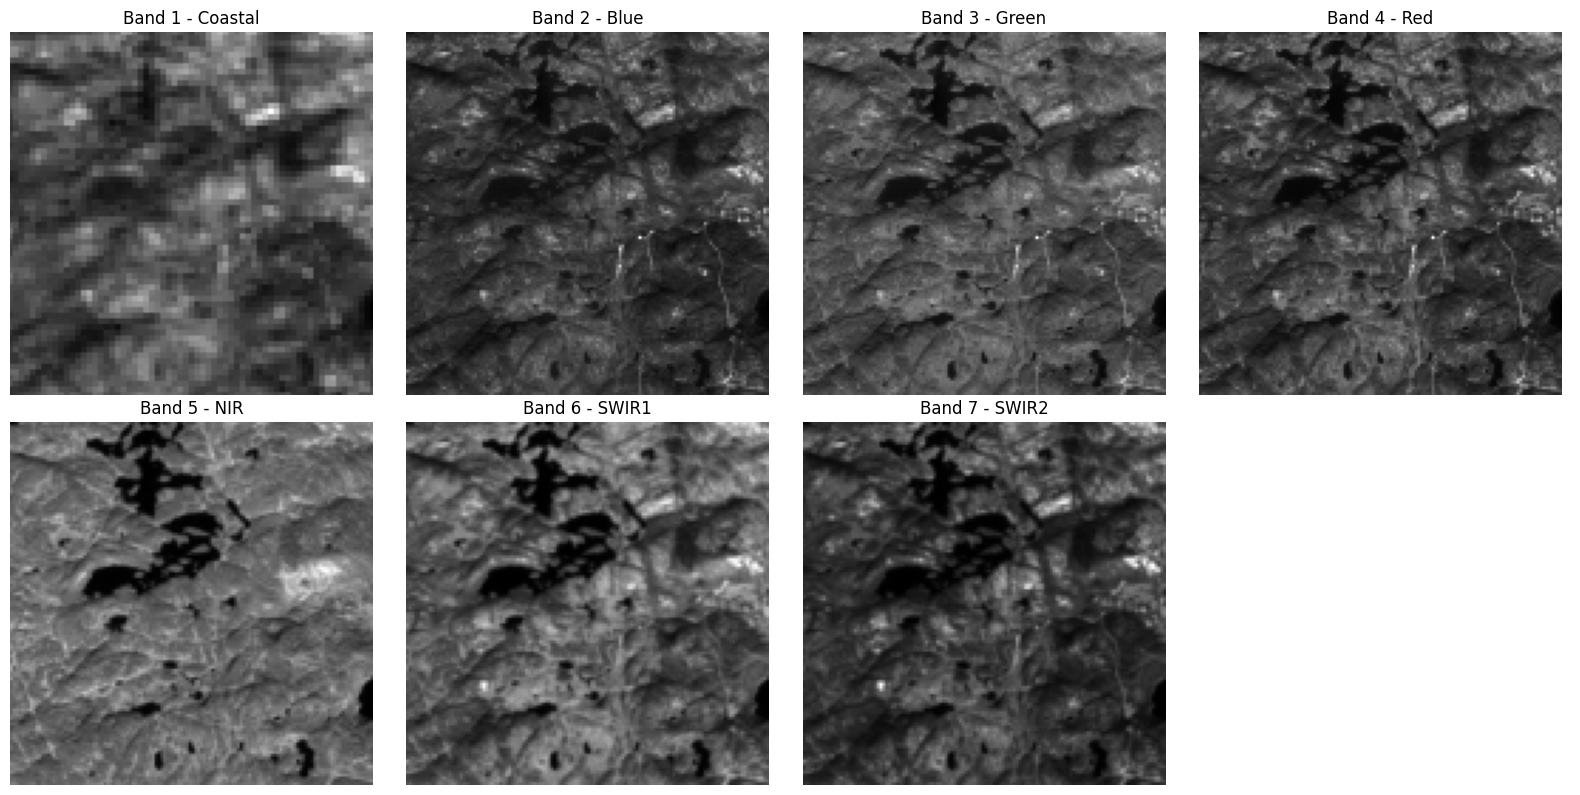

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

bands = [coastal_norm, blue_norm, green_norm, red_norm, nir_norm, swir1_norm, swir2_norm]
titles = ["Band 1 - Coastal", "Band 2 - Blue", "Band 3 - Green", "Band 4 - Red",
          "Band 5 - NIR", "Band 6 - SWIR1", "Band 7 - SWIR2"]

for i in range(7):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    ax.imshow(bands[i], cmap='gray')
    ax.set_title(titles[i])
    ax.axis('off')

axes[1, 3].axis('off')

plt.tight_layout()
plt.show()


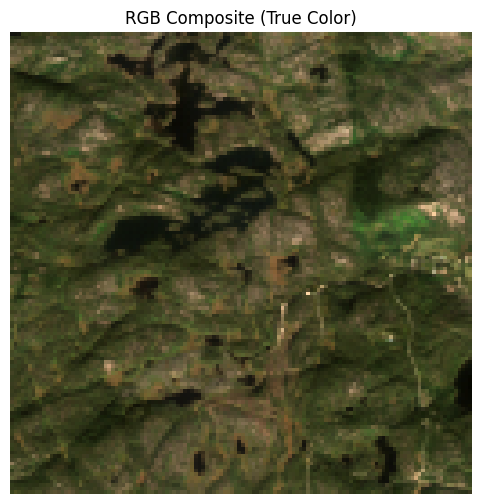

In [ ]:
rgb = np.stack([red, green, blue], axis=-1)
rgb_norm = (rgb - rgb.min()) / (rgb.max() - rgb.min())

plt.figure(figsize=(6, 6))
plt.imshow(rgb_norm)
plt.title("RGB Composite (True Color)")
plt.axis('off')
plt.show()


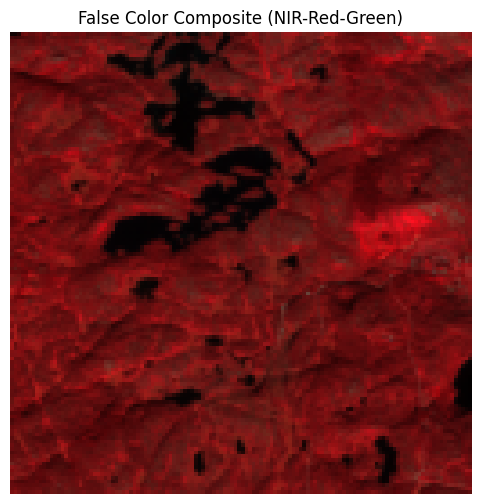

In [ ]:
false_color = np.stack([nir, red, green], axis=-1)
false_color_norm = (false_color - false_color.min()) / (false_color.max() - false_color.min())

plt.figure(figsize=(6, 6))
plt.imshow(false_color_norm)
plt.title("False Color Composite (NIR-Red-Green)")
plt.axis('off')
plt.show()


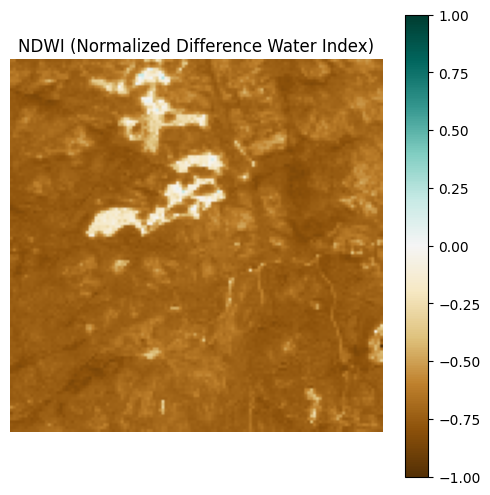

In [ ]:
ndwi = (green.astype(float) - nir.astype(float)) / (green + nir + 1e-5)

plt.figure(figsize=(6, 6))
plt.imshow(ndwi, cmap='BrBG', vmin=-1, vmax=1)
plt.title("NDWI (Normalized Difference Water Index)")
plt.colorbar()
plt.axis('off')
plt.show()


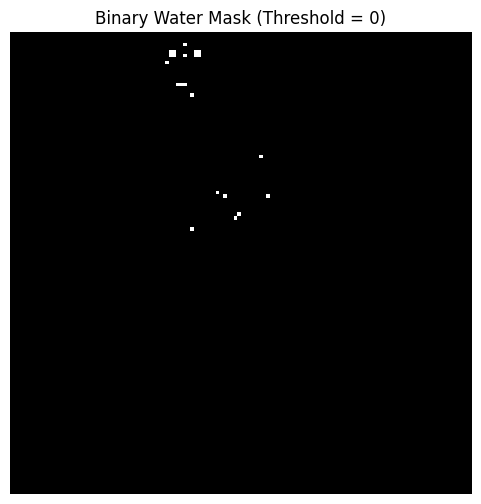

In [ ]:
ndwi_threshold = 0
water_mask = ndwi > ndwi_threshold

plt.figure(figsize=(6, 6))
plt.imshow(water_mask, cmap='gray')
plt.title(f"Binary Water Mask (Threshold = {ndwi_threshold})")
plt.axis('off')
plt.show()


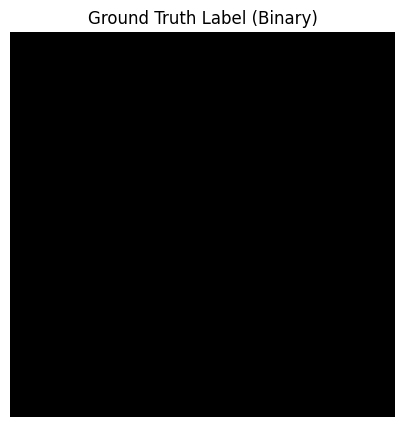

Unique values in label: [0]


In [ ]:
sample_label_path = os.path.join(labels_path, label_files[0])
label_img = Image.open(sample_label_path)
label_np = np.array(label_img)

plt.figure(figsize=(5, 5))
plt.imshow(label_np, cmap='gray')
plt.title("Ground Truth Label (Binary)")
plt.axis('off')
plt.show()

print("Unique values in label:", np.unique(label_np))

In [ ]:
print("Water mask shape:", water_mask.shape)
print("Unique values in water mask:", np.unique(water_mask).astype(int))

print("\nSample values (10x10 region):")
print(water_mask[:50, :50].astype(int))


Water mask shape: (128, 128)
Unique values in water mask: [0 1]

Sample values (10x10 region):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(label_np[:50 , :50].astype(int))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
water_pixels = np.argwhere(water_mask)

print("Number of water pixels:", len(water_pixels))



Number of water pixels: 22


In [ ]:
label_pizels = np.argwhere(label_np)
print("Number of water label pixels:", len(label_pizels))

Number of water label pixels: 0


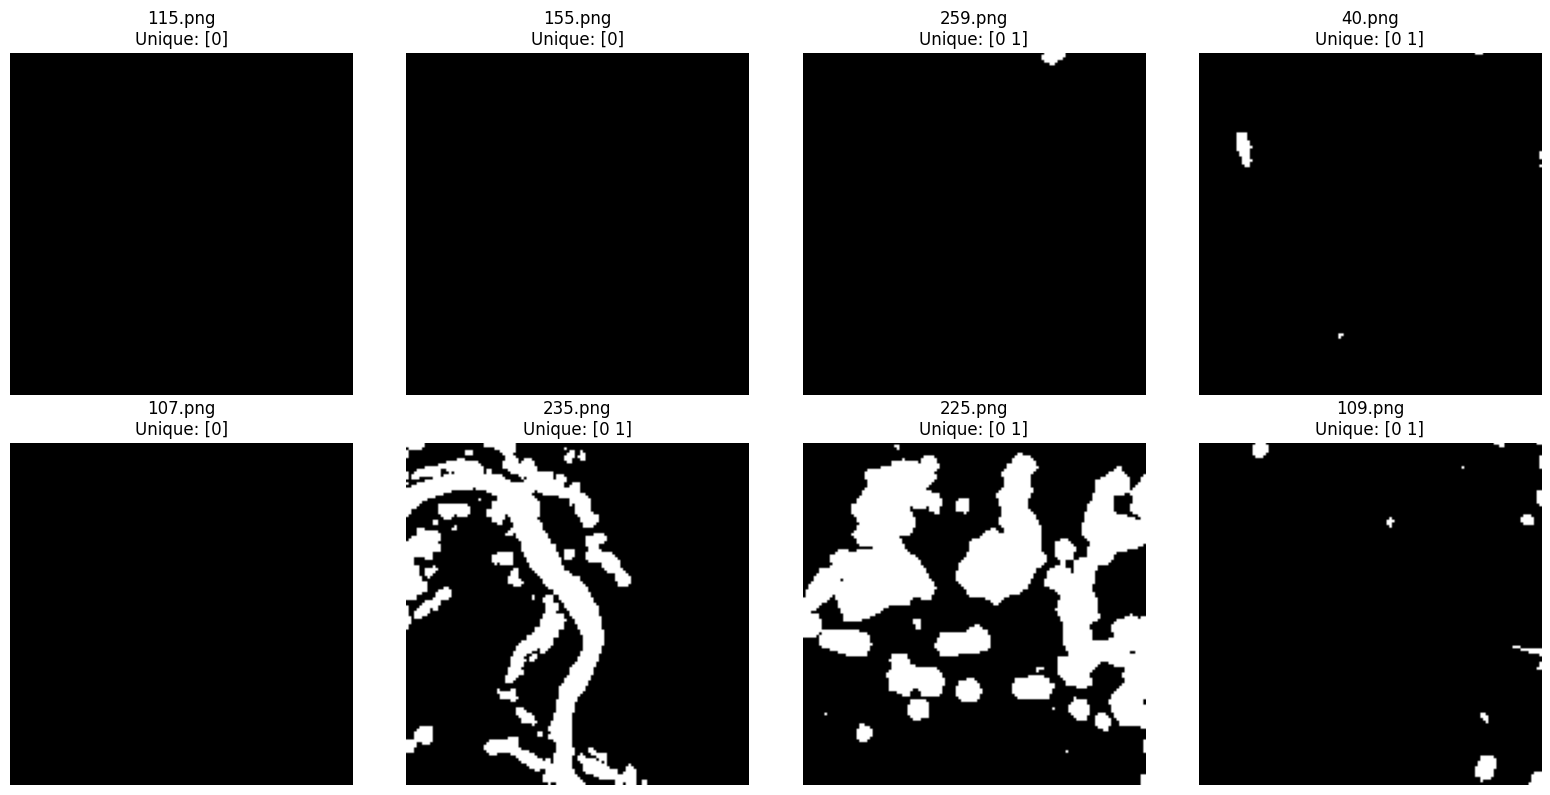

In [ ]:
n = 8
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i in range(n):
    label_path = os.path.join(labels_path, label_files[i])
    label_img = Image.open(label_path)
    label_np = np.array(label_img)

    axes[i//4, i%4].imshow(label_np, cmap='gray')
    axes[i//4, i%4].set_title(f"{label_files[i]}\nUnique: {np.unique(label_np)}")
    axes[i//4, i%4].axis('off')

plt.tight_layout()
plt.show()
